In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/spectra_with_target_T2.xls'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,410,431,452,473,494,515,536,557,578,599,...,2322,2343,2364,2385,2406,2427,2448,2469,2490,target
0,0.090324,0.101238,0.114578,0.123103,0.133078,0.146923,0.162286,0.177882,0.192084,0.203239,...,0.454942,0.446959,0.437525,0.427360,0.419569,0.406916,0.391896,0.379770,0.368482,5.86300
1,0.131854,0.148367,0.166992,0.181221,0.196285,0.214186,0.231929,0.248110,0.262880,0.275938,...,0.509642,0.511530,0.509270,0.503807,0.495855,0.485141,0.473004,0.461791,0.452180,4.03000
2,0.084136,0.095905,0.110716,0.121837,0.134306,0.150443,0.168480,0.188147,0.208530,0.226433,...,0.440456,0.440689,0.438324,0.434699,0.432151,0.426720,0.420321,0.415347,0.409941,6.01125
3,0.113672,0.127184,0.141348,0.153026,0.165494,0.179242,0.192422,0.205461,0.218959,0.231025,...,0.348064,0.350876,0.351524,0.351380,0.350397,0.348831,0.346525,0.343306,0.341373,3.79100
4,0.086320,0.099902,0.116533,0.128597,0.142634,0.161325,0.182055,0.203799,0.225014,0.242842,...,0.523441,0.520868,0.515178,0.507458,0.500742,0.489812,0.477522,0.466120,0.455389,4.23000


In [ ]:
# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (600, 100)
Target (y) shape: (600,)


In [ ]:
missing_values = X.isnull().sum()
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    print("Missing values in features:")
    print(missing_values)
    X = X.fillna(X.mean())
    print("Missing values filled with column mean.")
else:
    print("No missing values found in features.")

if y.isnull().any():
    print("\nMissing values in target:")
    print(y.isnull().sum())
else:
    print("No missing values found in target.")

No missing values found in features.
No missing values found in target.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the first 5 scaled features for visualization
num_features_to_plot = 5
selected_features = X_scaled_df.columns[:num_features_to_plot]

plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_features):
    plt.subplot(num_features_to_plot, 1, i + 1) # Create a subplot for each feature
    sns.histplot(X_scaled_df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of Scaled Feature: {col}')
    plt.xlabel('Scaled Value')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

NameError: name 'X_scaled_df' is not defined

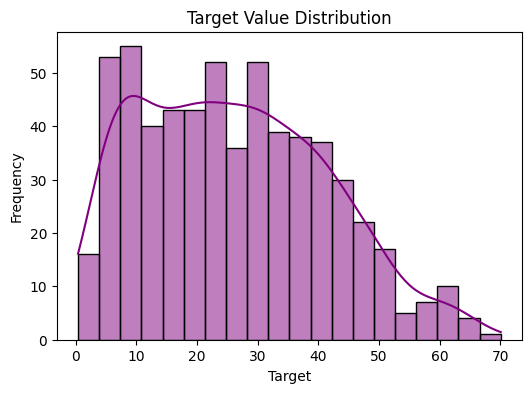

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(y, bins=20, kde=True, color='purple')
plt.title('Target Value Distribution')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

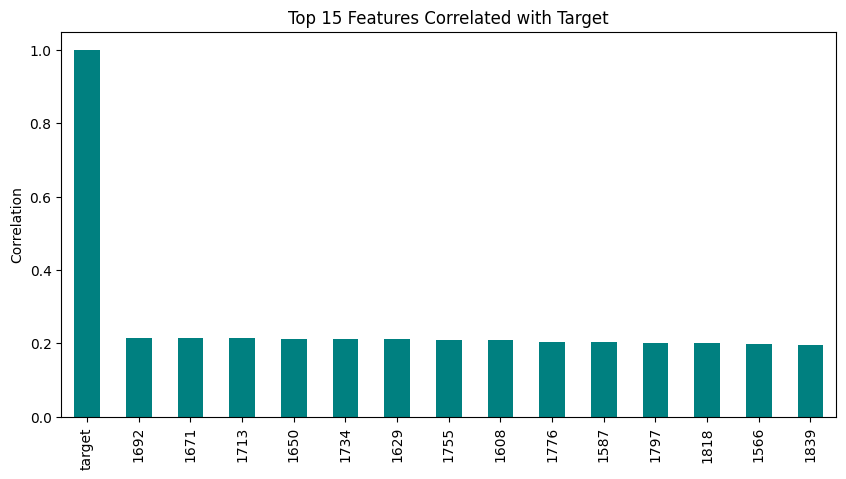

In [ ]:
corrs = df.corrwith(df['target']).sort_values(ascending=False)
plt.figure(figsize=(10,5))
corrs.head(15).plot(kind='bar', color='teal')
plt.title('Top 15 Features Correlated with Target')
plt.ylabel('Correlation')
plt.show()

In [ ]:
correlation_with_target = df.corrwith(df['target']).drop('target').sort_values(ascending=False)

num_top_features = 10
top_correlated_features = correlation_with_target.head(num_top_features).index.tolist()

X_selected = X[top_correlated_features]

print(f"Selected {num_top_features} features based on highest correlation with target:")
print(top_correlated_features)
print("\nShape of the new feature DataFrame (X_selected):", X_selected.shape)
display(X_selected.head())

Selected 10 features based on highest correlation with target:
['1692', '1671', '1713', '1650', '1734', '1629', '1755', '1608', '1776', '1587']

Shape of the new feature DataFrame (X_selected): (600, 10)


,1692,1671,1713,1650,1734,1629,1755,1608,1776,1587
0,0.496769,0.493908,0.498531,0.491457,0.498415,0.488697,0.497702,0.485845,0.496917,0.482800
1,0.487561,0.485296,0.488995,0.483610,0.488837,0.481987,0.487991,0.480304,0.487272,0.478546
2,0.414676,0.412728,0.416045,0.411527,0.416115,0.410447,0.415411,0.409565,0.414994,0.408780
3,0.326998,0.325779,0.327735,0.325091,0.327590,0.324477,0.326889,0.324042,0.326383,0.323745
4,0.541875,0.539348,0.543436,0.537654,0.543342,0.535889,0.542323,0.534141,0.541556,0.532428


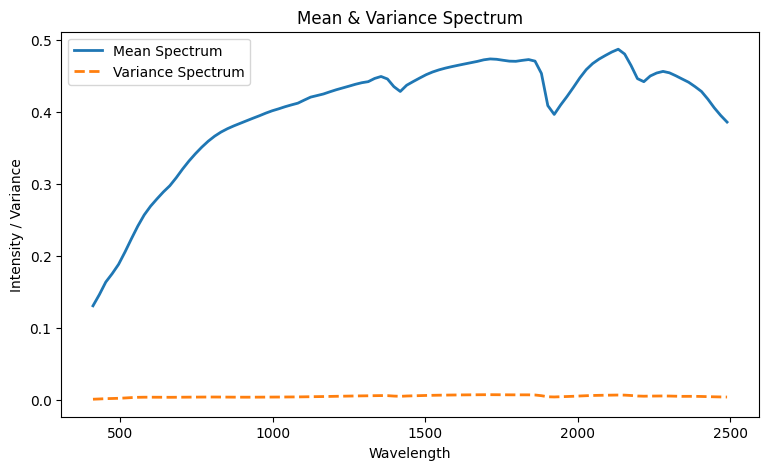

In [ ]:
plt.figure(figsize=(9,5))
plt.plot(X.columns.astype(int), X.mean(), label='Mean Spectrum', linewidth=2)
plt.plot(X.columns.astype(int), X.var(), label='Variance Spectrum', linewidth=2, linestyle='--')
plt.title('Mean & Variance Spectrum')
plt.xlabel('Wavelength')
plt.ylabel('Intensity / Variance')
plt.legend()
plt.show()

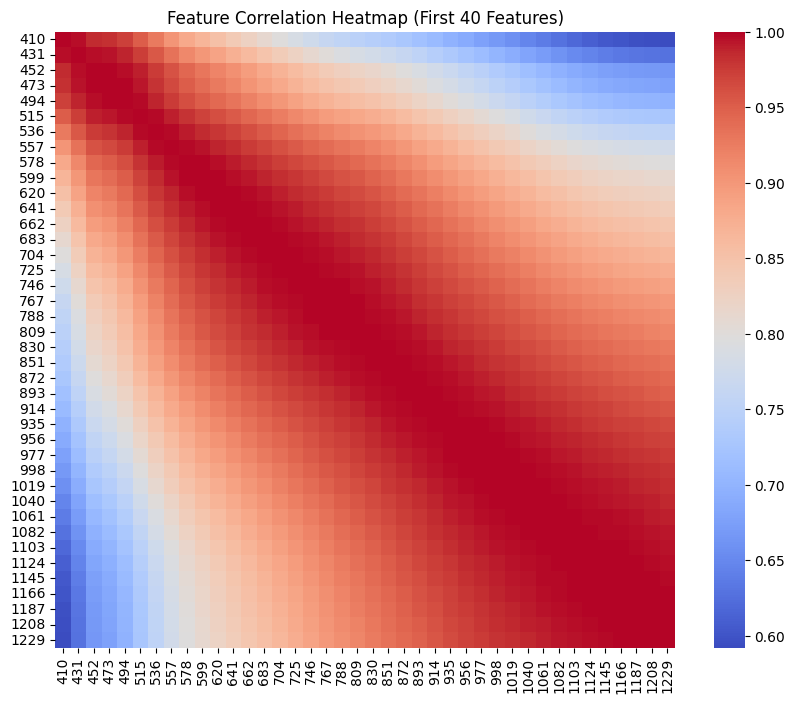

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.iloc[:, :40].corr(), cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Heatmap (First 40 Features)')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled_df) # Using X_scaled_df as the normalized input

plt.figure(figsize=(7,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y, cmap='viridis', s=35)
plt.colorbar(label='Target')
plt.title('PCA Visualization (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

NameError: name 'X_scaled_df' is not defined

In [ ]:
explained_var = np.cumsum(PCA().fit(X_scaled_df).explained_variance_ratio_) * 100 # Using X_scaled_df as the normalized input
plt.figure(figsize=(8,4))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.title('Cumulative Explained Variance by PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance (%)')
plt.grid(True)
plt.show()

NameError: name 'X_scaled_df' is not defined

In [ ]:
!pip install streamlit pandas numpy scikit-learn

print("Required packages installed successfully.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 96.3 MB/s eta 0:00:00
Required packages installed successfully.


In [ ]:
import pandas as pd
import os

# Install necessary packages for reading Excel files
!pip install xlrd openpyxl

def load_data(file_path):
    """
    Loads data from a given file path into a pandas DataFrame.
    Supports CSV and Excel file formats, specifying engine for Excel.
    """
    file_extension = os.path.splitext(file_path)[1].lower()

    if file_extension == '.csv':
        df = pd.read_csv(file_path)
    elif file_extension == '.xls':
        try:
            # Try reading as CSV first, as some .xls files are actually CSV
            df = pd.read_csv(file_path)
        except Exception:
            # If it fails to read as CSV, try as Excel
            df = pd.read_excel(file_path, engine='xlrd')
    elif file_extension == '.xlsx':
        df = pd.read_excel(file_path, engine='openpyxl')
    else:
        raise ValueError("Unsupported file format. Please provide a CSV or Excel file.")

    print(f"Data loaded successfully from {file_path}. Shape: {df.shape}")
    return df

# Example usage with the existing file_path from the notebook
try:
    loaded_df = load_data(file_path)
    print("\nFirst 5 rows of the loaded DataFrame:")
    display(loaded_df.head())
except ValueError as e:
    print(f"Error: {e}")

Data loaded successfully from /content/drive/MyDrive/Colab Notebooks/spectra_with_target_T2.xls. Shape: (600, 101)

First 5 rows of the loaded DataFrame:


,410,431,452,473,494,515,536,557,578,599,...,2322,2343,2364,2385,2406,2427,2448,2469,2490,target
0,0.090324,0.101238,0.114578,0.123103,0.133078,0.146923,0.162286,0.177882,0.192084,0.203239,...,0.454942,0.446959,0.437525,0.427360,0.419569,0.406916,0.391896,0.379770,0.368482,24.63
1,0.131854,0.148367,0.166992,0.181221,0.196285,0.214186,0.231929,0.248110,0.262880,0.275938,...,0.509642,0.511530,0.509270,0.503807,0.495855,0.485141,0.473004,0.461791,0.452180,5.29
2,0.084136,0.095905,0.110716,0.121837,0.134306,0.150443,0.168480,0.188147,0.208530,0.226433,...,0.440456,0.440689,0.438324,0.434699,0.432151,0.426720,0.420321,0.415347,0.409941,23.49
3,0.113672,0.127184,0.141348,0.153026,0.165494,0.179242,0.192422,0.205461,0.218959,0.231025,...,0.348064,0.350876,0.351524,0.351380,0.350397,0.348831,0.346525,0.343306,0.341373,4.51
4,0.086320,0.099902,0.116533,0.128597,0.142634,0.161325,0.182055,0.203799,0.225014,0.242842,...,0.523441,0.520868,0.515178,0.507458,0.500742,0.489812,0.477522,0.466120,0.455389,19.66


In [ ]:
def select_target_variable(df, target_column_name):
    """
    Separates a DataFrame into features (X) and a target variable (y).

    Args:
        df (pd.DataFrame): The input DataFrame.
        target_column_name (str): The name of the column to be used as the target variable.

    Returns:
        tuple: A tuple containing:
            - X (pd.DataFrame): The feature DataFrame.
            - y (pd.Series): The target Series.
    """
    if target_column_name not in df.columns:
        raise ValueError(f"Target column '{target_column_name}' not found in the DataFrame.")

    X = df.drop(columns=[target_column_name])
    y = df[target_column_name]
    return X, y

# Demonstrate the usage of the function
try:
    X_new, y_new = select_target_variable(loaded_df, 'target')
    print("Shape of new features (X_new):", X_new.shape)
    print("Shape of new target (y_new):", y_new.shape)
    print("\nFirst 5 rows of X_new:")
    display(X_new.head())
    print("\nFirst 5 values of y_new:")
    display(y_new.head())
except ValueError as e:
    print(f"Error: {e}")

Shape of new features (X_new): (600, 100)
Shape of new target (y_new): (600,)

First 5 rows of X_new:


,410,431,452,473,494,515,536,557,578,599,...,2301,2322,2343,2364,2385,2406,2427,2448,2469,2490
0,0.090324,0.101238,0.114578,0.123103,0.133078,0.146923,0.162286,0.177882,0.192084,0.203239,...,0.459622,0.454942,0.446959,0.437525,0.427360,0.419569,0.406916,0.391896,0.379770,0.368482
1,0.131854,0.148367,0.166992,0.181221,0.196285,0.214186,0.231929,0.248110,0.262880,0.275938,...,0.508101,0.509642,0.511530,0.509270,0.503807,0.495855,0.485141,0.473004,0.461791,0.452180
2,0.084136,0.095905,0.110716,0.121837,0.134306,0.150443,0.168480,0.188147,0.208530,0.226433,...,0.441668,0.440456,0.440689,0.438324,0.434699,0.432151,0.426720,0.420321,0.415347,0.409941
3,0.113672,0.127184,0.141348,0.153026,0.165494,0.179242,0.192422,0.205461,0.218959,0.231025,...,0.346386,0.348064,0.350876,0.351524,0.351380,0.350397,0.348831,0.346525,0.343306,0.341373
4,0.086320,0.099902,0.116533,0.128597,0.142634,0.161325,0.182055,0.203799,0.225014,0.242842,...,0.527795,0.523441,0.520868,0.515178,0.507458,0.500742,0.489812,0.477522,0.466120,0.455389



First 5 values of y_new:


,target
0,24.63
1,5.29
2,23.49
3,4.51
4,19.66


In [ ]:
def apply_reflectance(X_raw):
    """
    Converts raw spectral data to reflectance by normalizing each spectrum
    (row) by its maximum value. This assumes the raw data represents intensity.

    Args:
        X_raw (pd.DataFrame): The DataFrame containing raw spectral features.

    Returns:
        pd.DataFrame: The DataFrame with reflectance values.
    """
    # Normalize each spectrum (row) by its maximum value
    # This assumes that the highest intensity in each spectrum can be normalized to 1,
    # simulating a relative reflectance conversion when a true white reference is not available.
    X_reflectance = X_raw.div(X_raw.max(axis=1), axis=0)
    return X_reflectance

# Demonstrate the function's usage with X_new
X_reflectance = apply_reflectance(X_new)

print("Shape of reflectance DataFrame (X_reflectance):", X_reflectance.shape)
print("\nFirst 5 rows of X_reflectance:")
display(X_reflectance.head())

Shape of reflectance DataFrame (X_reflectance): (600, 100)

First 5 rows of X_reflectance:


,410,431,452,473,494,515,536,557,578,599,...,2301,2322,2343,2364,2385,2406,2427,2448,2469,2490
0,0.178368,0.199919,0.226262,0.243097,0.262794,0.290135,0.320472,0.351271,0.379317,0.401345,...,0.907637,0.898393,0.882629,0.863999,0.843927,0.828541,0.803554,0.773895,0.749948,0.727658
1,0.250426,0.281788,0.317163,0.344187,0.372797,0.406796,0.440496,0.471228,0.499280,0.524080,...,0.965020,0.967947,0.971532,0.967240,0.956865,0.941762,0.921412,0.898362,0.877065,0.858811
2,0.185334,0.211258,0.243884,0.268380,0.295848,0.331393,0.371126,0.414448,0.459348,0.498783,...,0.972900,0.970231,0.970742,0.965534,0.957549,0.951937,0.939972,0.925877,0.914919,0.903011
3,0.322216,0.360517,0.400668,0.433770,0.469111,0.508081,0.545442,0.582403,0.620663,0.654864,...,0.981869,0.986624,0.994595,0.996433,0.996025,0.993238,0.988799,0.982261,0.973137,0.967659
4,0.152558,0.176561,0.205953,0.227276,0.252084,0.285117,0.321754,0.360184,0.397678,0.429185,...,0.932796,0.925102,0.920554,0.910498,0.896854,0.884985,0.865668,0.843947,0.823795,0.804830


In [ ]:
import numpy as np

def apply_absorbance(X_reflectance):
    """
    Converts reflectance data to absorbance using the formula log10(1/R).

    Args:
        X_reflectance (pd.DataFrame): The DataFrame containing reflectance values.

    Returns:
        pd.DataFrame: The DataFrame with calculated absorbance values.
    """
    # Ensure there are no zero or negative reflectance values to avoid errors in log and division
    # A small epsilon is added to avoid log(0) issues, if any values are exactly zero.
    X_reflectance_safe = X_reflectance.replace(0, np.nan).fillna(X_reflectance.mean())
    X_absorbance = np.log10(1 / X_reflectance_safe)
    return X_absorbance

# Call the function with X_reflectance
X_absorbance = apply_absorbance(X_reflectance)

print("Shape of absorbance DataFrame (X_absorbance):", X_absorbance.shape)
print("\nFirst 5 rows of X_absorbance:")
display(X_absorbance.head())

Shape of absorbance DataFrame (X_absorbance): (600, 100)

First 5 rows of X_absorbance:


,410,431,452,473,494,515,536,557,578,599,...,2301,2322,2343,2364,2385,2406,2427,2448,2469,2490
0,0.748684,0.699146,0.645389,0.614221,0.580384,0.537399,0.494209,0.454358,0.420997,0.396482,...,0.042088,0.046534,0.054222,0.063487,0.073695,0.081686,0.094985,0.111318,0.124969,0.138073
1,0.601321,0.550077,0.498717,0.463205,0.428528,0.390623,0.356058,0.326769,0.301656,0.280603,...,0.015464,0.014148,0.012543,0.014466,0.019149,0.026059,0.035546,0.046549,0.056968,0.066102
2,0.732045,0.675186,0.612818,0.571250,0.528931,0.479657,0.430479,0.382530,0.337858,0.302088,...,0.011932,0.013125,0.012896,0.015232,0.018839,0.021392,0.026885,0.033447,0.038617,0.044307
3,0.491853,0.443074,0.397216,0.362741,0.328724,0.294067,0.263252,0.234777,0.207144,0.183849,...,0.007947,0.005848,0.002354,0.001552,0.001730,0.002947,0.004892,0.007773,0.011826,0.014278
4,0.816566,0.753106,0.686231,0.643447,0.598454,0.544977,0.492476,0.443476,0.400468,0.367355,...,0.030213,0.033811,0.035951,0.040721,0.047278,0.053064,0.062649,0.073685,0.084181,0.094296


In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

def apply_continuum_removal(X_data):
    """
    Performs Continuum Removal on spectral data using an iterative convex hull (rubber band) approach.

    Args:
        X_data (pd.DataFrame): The DataFrame containing spectral values (e.g., absorbance).
                               Rows are samples, columns are wavelengths.

    Returns:
        pd.DataFrame: The DataFrame with continuum-removed spectral values.
    """
    X_continuum_removed = X_data.copy()
    wavelengths = X_data.columns.astype(float).values

    for index, spectrum_values in X_data.iterrows():
        # Initialize continuum points with the first and last points of the spectrum
        continuum_x = [wavelengths[0], wavelengths[-1]]
        continuum_y = [spectrum_values.iloc[0], spectrum_values.iloc[-1]]

        # Iteratively add points to the continuum line until no more points are above it
        while True:
            found_new_point = False
            # Sort current continuum points by x-coordinate (wavelength)
            sorted_indices = np.argsort(continuum_x)
            current_continuum_x = [continuum_x[i] for i in sorted_indices]
            current_continuum_y = [continuum_y[i] for i in sorted_indices]

            max_deviation = -1  # Stores the maximum positive deviation found in this iteration
            point_to_add_idx = -1  # Stores the index in `wavelengths` of the point to add

            # Iterate through each segment of the current continuum line
            for i in range(len(current_continuum_x) - 1):
                x1, y1 = current_continuum_x[i], current_continuum_y[i]
                x2, y2 = current_continuum_x[i+1], current_continuum_y[i+1]

                # Find points in the original spectrum that lie between x1 and x2
                segment_mask = (wavelengths > x1) & (wavelengths < x2)
                segment_wavelengths = wavelengths[segment_mask]
                segment_spectrum_values = spectrum_values[segment_mask]

                if len(segment_wavelengths) == 0:
                    continue

                # Calculate the line segment equation: y = m*x + b
                # Avoid division by zero if x2 - x1 is very small (shouldn't happen with distinct wavelengths)
                if x2 - x1 == 0:
                    continue
                m = (y2 - y1) / (x2 - x1)
                b = y1 - m * x1

                # Calculate the predicted y-values for the segment's wavelengths based on the line
                predicted_y = m * segment_wavelengths + b

                # Calculate deviations and find the maximum positive deviation
                deviations = segment_spectrum_values.values - predicted_y

                if np.any(deviations > 0):
                    local_max_deviation = np.max(deviations)
                    if local_max_deviation > max_deviation:
                        max_deviation = local_max_deviation
                        # Get the actual index from the original `wavelengths` array
                        point_in_segment_idx = np.argmax(deviations)
                        point_to_add_idx = np.where(wavelengths == segment_wavelengths[point_in_segment_idx])[0][0]

            # If a new point was found that lies above the current continuum line, add it
            if point_to_add_idx != -1:
                continuum_x.append(wavelengths[point_to_add_idx])
                continuum_y.append(spectrum_values.iloc[point_to_add_idx])
                found_new_point = True

            # If no new point was found, the continuum is stable
            if not found_new_point:
                break

        # Sort the final continuum points by x-coordinate for interpolation
        final_continuum_points = sorted(zip(continuum_x, continuum_y))
        final_continuum_x, final_continuum_y = zip(*final_continuum_points)

        # Interpolate the continuum line for all original wavelengths
        # Use linear interpolation. fill_value="extrapolate" handles values outside the range, though
        # for spectral data, wavelengths[0] and wavelengths[-1] should define the full range.
        if len(final_continuum_x) < 2:
             # If for some reason only one point defines the continuum (e.g., flat spectrum),
             # the continuum line is constant. Use the first point's intensity, or 1.0 if empty.
            continuum_line = np.full_like(wavelengths, final_continuum_y[0] if final_continuum_y else 1.0)
        else:
            interp_func = interp1d(final_continuum_x, final_continuum_y, kind='linear', fill_value="extrapolate")
            continuum_line = interp_func(wavelengths)

        # Ensure no division by zero or very small numbers
        epsilon = 1e-9
        continuum_line[continuum_line <= epsilon] = epsilon

        # Divide the original spectrum by its continuum line
        X_continuum_removed.loc[index] = spectrum_values.values / continuum_line

    return X_continuum_removed

# Call the function with X_absorbance
X_continuum_removed = apply_continuum_removal(X_absorbance)

print("Shape of continuum-removed DataFrame (X_continuum_removed):", X_continuum_removed.shape)
print("\nFirst 5 rows of X_continuum_removed:")
display(X_continuum_removed.head())

Shape of continuum-removed DataFrame (X_continuum_removed): (600, 100)

First 5 rows of X_continuum_removed:


,410,431,452,473,494,515,536,557,578,599,...,2301,2322,2343,2364,2385,2406,2427,2448,2469,2490
0,1.0,0.941587,0.876466,0.841180,0.801609,0.748613,0.694412,0.643995,0.601971,0.571959,...,0.217446,0.248323,0.299194,0.362653,0.436333,0.501968,0.606671,0.740135,0.866411,1.0
1,1.0,0.923078,0.844549,0.791655,0.739215,0.680170,0.625873,0.579897,0.540513,0.507706,...,0.134777,0.129407,0.120686,0.146826,0.205641,0.297078,0.431841,0.605237,0.796689,1.0
2,1.0,0.931161,0.853319,0.803203,0.751034,0.687850,0.623536,0.559712,0.499423,0.451179,...,0.111722,0.131440,0.138801,0.177187,0.238396,0.296778,0.412745,0.574747,0.753501,1.0
3,1.0,0.909746,0.823741,0.759845,0.695616,0.628692,0.568673,0.512500,0.456991,0.409958,...,0.137789,0.110659,0.049008,0.035919,0.045059,0.087787,0.170192,0.324943,0.619177,1.0
4,1.0,0.930595,0.855669,0.809683,0.760041,0.698595,0.637250,0.579312,0.528163,0.489196,...,0.188921,0.221515,0.247355,0.294977,0.361573,0.429795,0.539274,0.676754,0.828650,1.0


In [ ]:
import sys
!{sys.executable} -m pip install cubist
print("Cubist package installation initiated. If already installed, requirements will be satisfied.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 593.5/593.5 kB 6.1 MB/s eta 0:00:00
Cubist package installation initiated. If already installed, requirements will be satisfied.


In [ ]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from cubist import Cubist # Corrected import from CubistRegressor to Cubist
from sklearn.model_selection import GridSearchCV # New import

def get_ml_model(model_name, **kwargs):
    """
    Returns an unfitted instance of the specified machine learning model and its hyperparameter grid.

    Args:
        model_name (str): The name of the model to retrieve (e.g., 'PLSR', 'Cubist', 'GBRT', 'KRR', 'SVR').
        **kwargs: Optional keyword arguments to pass to the model's constructor.

    Returns:
        tuple: A tuple containing:
            - An unfitted instance of the specified scikit-learn compatible model.
            - A dictionary representing the hyperparameter grid for GridSearchCV.

    Raises:
        ValueError: If an unsupported model_name is provided.
    """
    param_grid = {}

    if model_name == 'PLSR':
        n_components = kwargs.pop('n_components', 2)
        model = PLSRegression(n_components=n_components, **kwargs)
        param_grid = {'n_components': [1, 2, 3, 4, 5]}
    elif model_name == 'Cubist':
        n_committees = kwargs.pop('n_committees', 1)
        model = Cubist(n_committees=n_committees, **kwargs)
        param_grid = {'n_committees': [1, 5, 10]}
    elif model_name == 'GBRT':
        random_state = kwargs.pop('random_state', 42)
        model = GradientBoostingRegressor(random_state=random_state, **kwargs)
        param_grid = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
    elif model_name == 'KRR':
        alpha = kwargs.pop('alpha', 1.0)
        model = KernelRidge(alpha=alpha, **kwargs)
        param_grid = {'alpha': [0.1, 1.0, 10.0], 'kernel': ['rbf', 'linear']}
    elif model_name == 'SVR':
        C = kwargs.pop('C', 1.0)
        epsilon = kwargs.pop('epsilon', 0.1)
        model = SVR(C=C, epsilon=epsilon, **kwargs)
        param_grid = {'C': [0.1, 1.0, 10.0], 'epsilon': [0.01, 0.1, 0.2], 'kernel': ['rbf']}
    else:
        raise ValueError(f"Unsupported model name: {model_name}")

    return model, param_grid

# Demonstrate the usage of the modified get_ml_model function
try:
    # Example 1: Get a GBRT model with default parameters and its grid
    gbrt_model, gbrt_param_grid = get_ml_model('GBRT')
    print(f"GBRT model (default params):\n{gbrt_model}")
    print(f"GBRT param grid: {gbrt_param_grid}")

    # Example 2: Get a PLSR model with a specific number of components and its grid
    plsr_model, plsr_param_grid = get_ml_model('PLSR', n_components=5)
    print(f"\nPLSR model (n_components=5):\n{plsr_model}")
    print(f"PLSR param grid: {plsr_param_grid}")

    # Example 3: Get a Cubist model with a specific number of committees and its grid
    cubist_model, cubist_param_grid = get_ml_model('Cubist', n_committees=10)
    print(f"\nCubist model (n_committees=10):\n{cubist_model}")
    print(f"Cubist param grid: {cubist_param_grid}")

except ValueError as e:
    print(f"Error: {e}")

GBRT model (default params):
GradientBoostingRegressor(random_state=42)
GBRT param grid: {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}

PLSR model (n_components=5):
PLSRegression(n_components=5)
PLSR param grid: {'n_components': [1, 2, 3, 4, 5]}

Cubist model (n_committees=10):
Cubist(n_committees=10)
Cubist param grid: {'n_committees': [1, 5, 10]}


In [48]:
def calculate_metrics(y_true, y_pred):
    """
    Calculates R-squared, Root Mean Squared Error (RMSE), and Ratio of Performance to Deviation (RPD).
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    r_squared = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    std_dev_true = np.std(y_true)
    if std_dev_true == 0:
        rpd = np.nan
    else:
        rpd = std_dev_true / rmse

    return r_squared, rmse, rpd


Applying preprocessing: None
 Training model: PLSR with None preprocessing
 Training model: Cubist with None preprocessing
 Training model: GBRT with None preprocessing
 Training model: KRR with None preprocessing
 Training model: SVR with None preprocessing

Applying preprocessing: Reflectance
 Training model: PLSR with Reflectance preprocessing
 Training model: Cubist with Reflectance preprocessing
 Training model: GBRT with Reflectance preprocessing
 Training model: KRR with Reflectance preprocessing
 Training model: SVR with Reflectance preprocessing

Applying preprocessing: Absorbance
 Training model: PLSR with Absorbance preprocessing
 Training model: Cubist with Absorbance preprocessing
 Training model: GBRT with Absorbance preprocessing
 Training model: KRR with Absorbance preprocessing
 Training model: SVR with Absorbance preprocessing

Applying preprocessing: Continuum Removal
 Training model: PLSR with Continuum Removal preprocessing
 Training model: Cubist with Continuum R

,preprocessing,model,total_time,mean_rmse,std_rmse,mean_r2,std_r2,best_params
0,None,PLSR,5.460512,7.859678,0.681017,0.724542,0.070884,{'n_components': 5}
1,None,Cubist,9.965636,5.169065,0.378571,0.883071,0.018540,{'n_committees': 5}
2,None,GBRT,305.525939,8.140384,0.598620,0.706597,0.066565,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
3,None,KRR,2.299611,9.716910,0.217692,0.587833,0.038339,"{'alpha': 0.1, 'kernel': 'linear'}"
4,None,SVR,4.188420,8.011350,0.265145,0.720576,0.018669,"{'C': 10.0, 'epsilon': 0.2, 'kernel': 'rbf'}"
5,Reflectance,PLSR,1.073860,7.427544,0.267101,0.759152,0.024181,{'n_components': 5}
6,Reflectance,Cubist,13.592891,4.797001,0.351997,0.899537,0.013875,{'n_committees': 10}
7,Reflectance,GBRT,305.323418,7.282389,0.305539,0.767042,0.036608,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
8,Reflectance,KRR,2.589176,6.877731,0.231128,0.793167,0.023374,"{'alpha': 0.1, 'kernel': 'linear'}"
9,Reflectance,SVR,6.136444,7.595645,0.242873,0.747014,0.034505,"{'C': 10.0, 'epsilon': 0.2, 'kernel': 'rbf'}"



Displaying first 5 rows of detailed results:


,preprocessing,model,fold,best_params,y_true,y_pred
0,None,PLSR,0,{'n_components': 5},"[23.49, 10.34, 24.26, 21.37, 2.88, 43.64, 5.8,...","[5.275356408618801, 20.38916492333383, 7.57516..."
1,None,PLSR,1,{'n_components': 5},"[24.63, 12.87, 6.16, 8.69, 53.99, 16.27, 2.01,...","[33.09327877142053, 15.626508866004947, 7.9334..."
2,None,PLSR,2,{'n_components': 5},"[4.51, 11.62, 9.09, 12.9, 41.26, 3.26, 25.17, ...","[12.351201102782685, 29.688983783942632, 16.77..."
3,None,PLSR,3,{'n_components': 5},"[19.66, 26.47, 21.35, 47.97, 8.31, 29.78, 5.8,...","[22.978363387771488, 27.835963205679665, 26.14..."
4,None,PLSR,4,{'n_components': 5},"[5.29, 17.95, 20.48, 29.46, 4.91, 16.25, 5.4, ...","[5.406918300632491, 14.763844435052398, 15.104..."



Generating Training History Graphs:


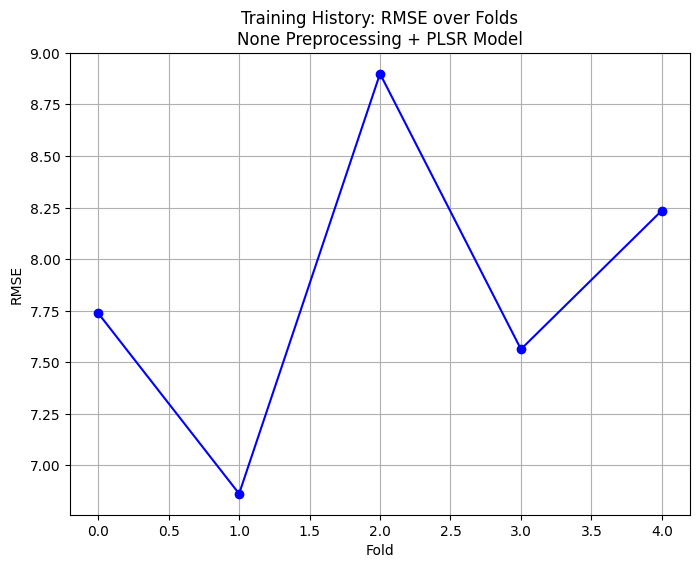

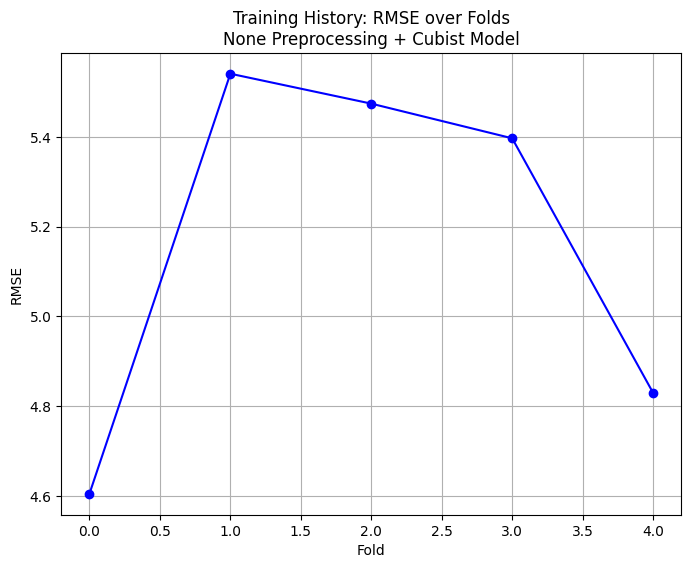

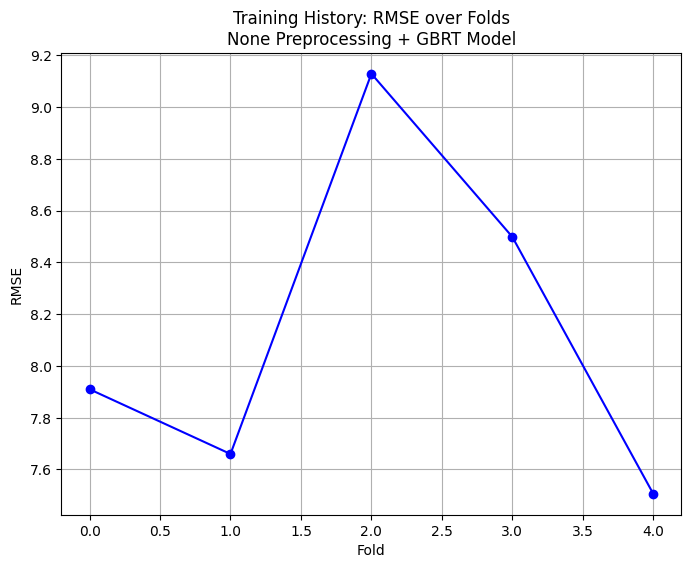

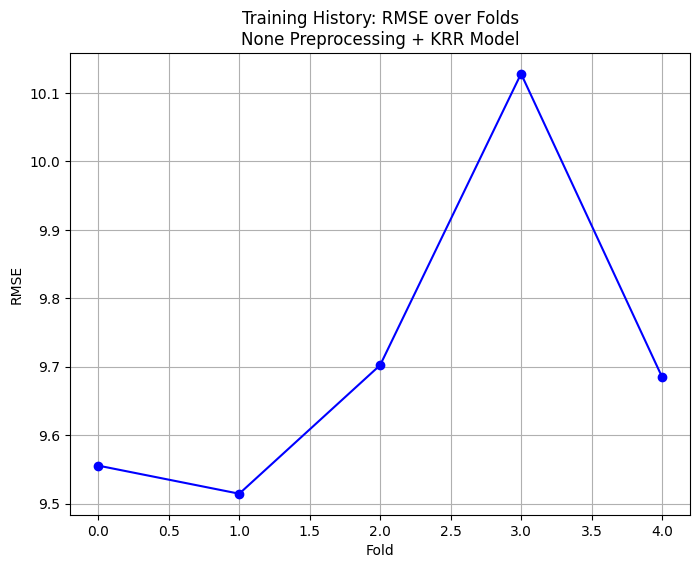

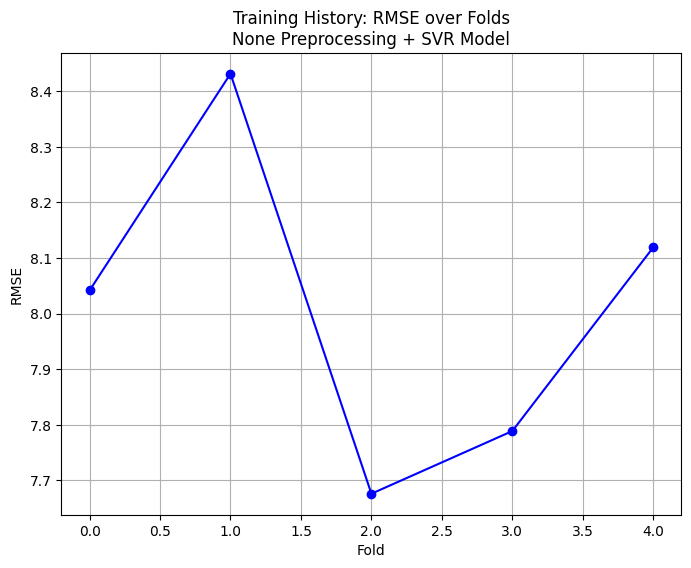

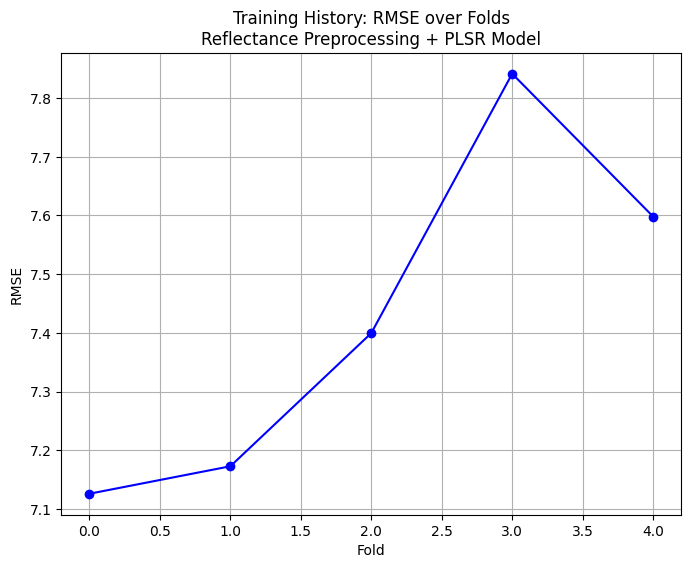

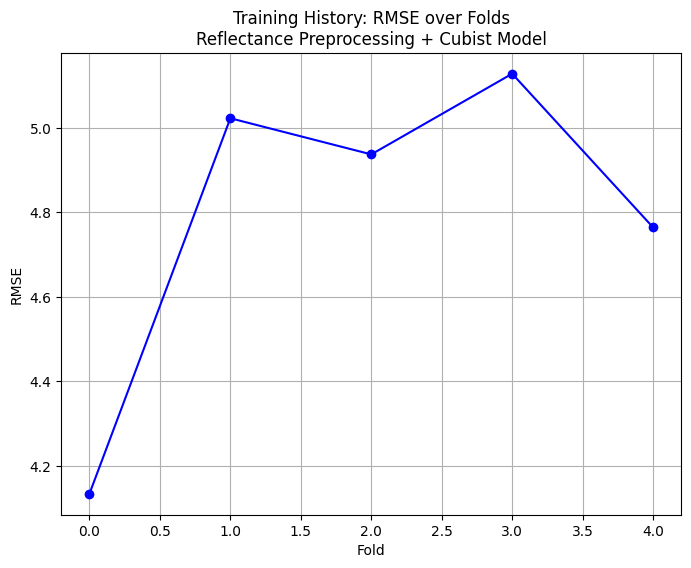

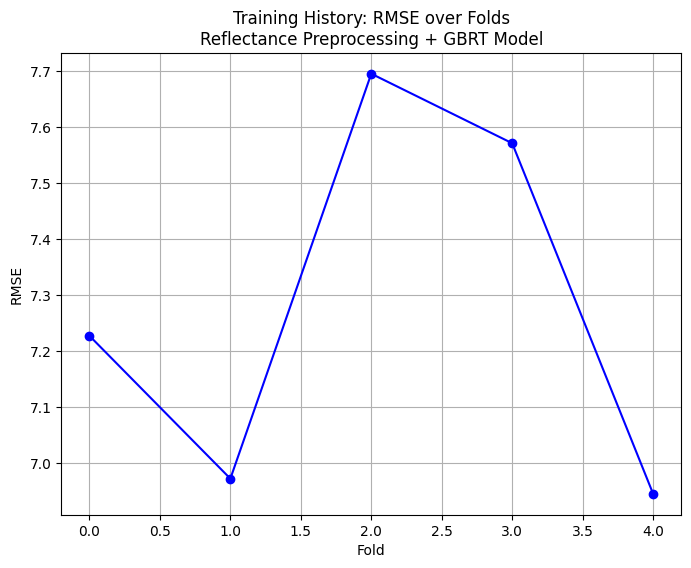

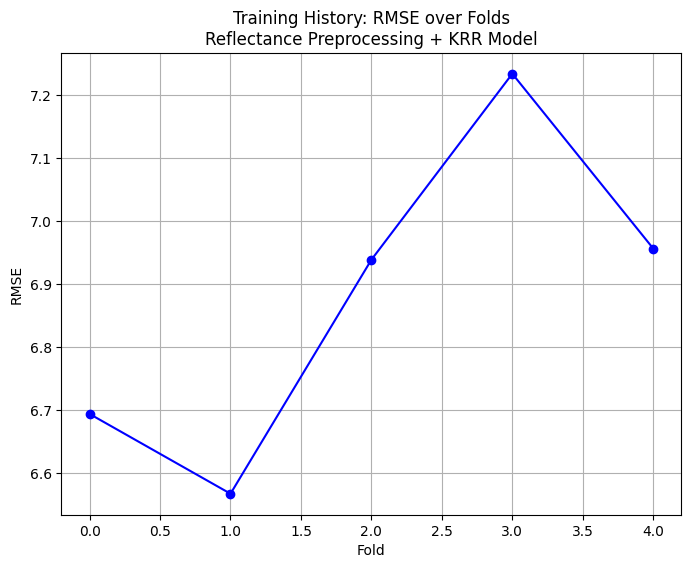

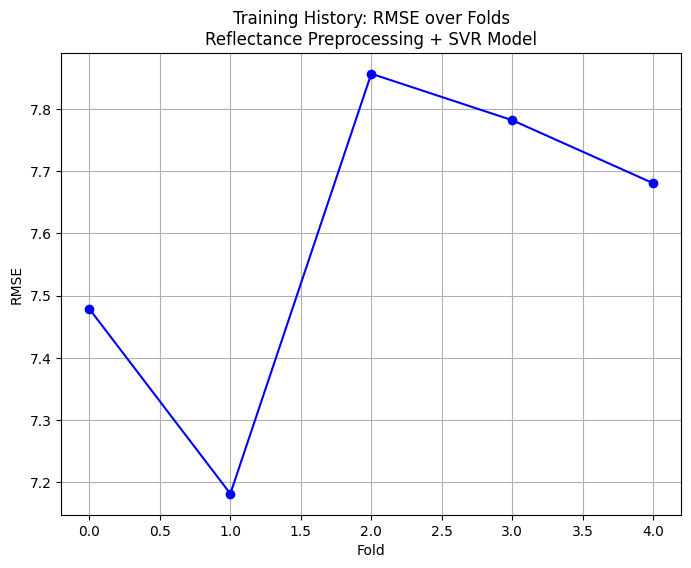

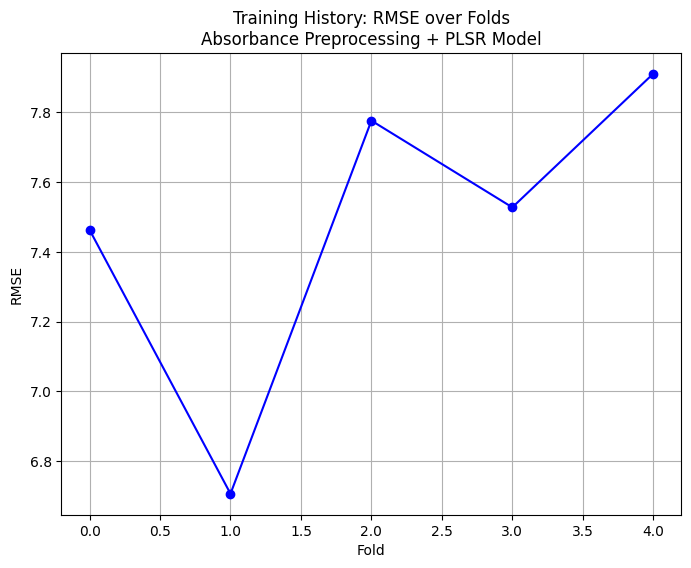

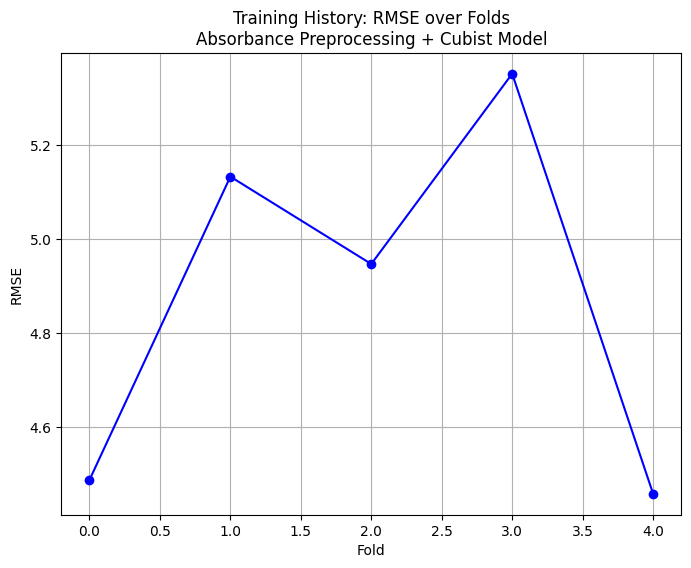

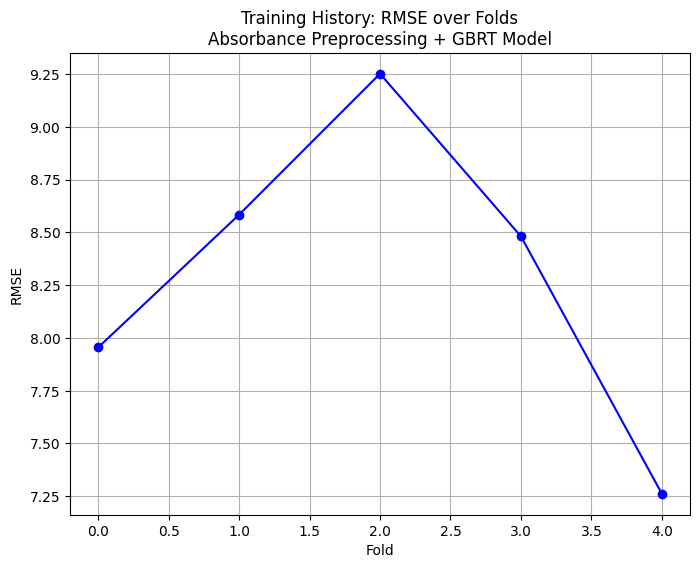

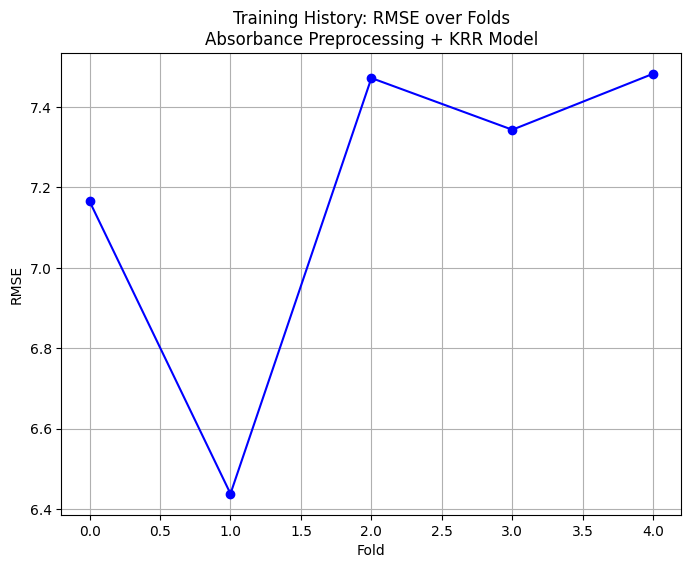

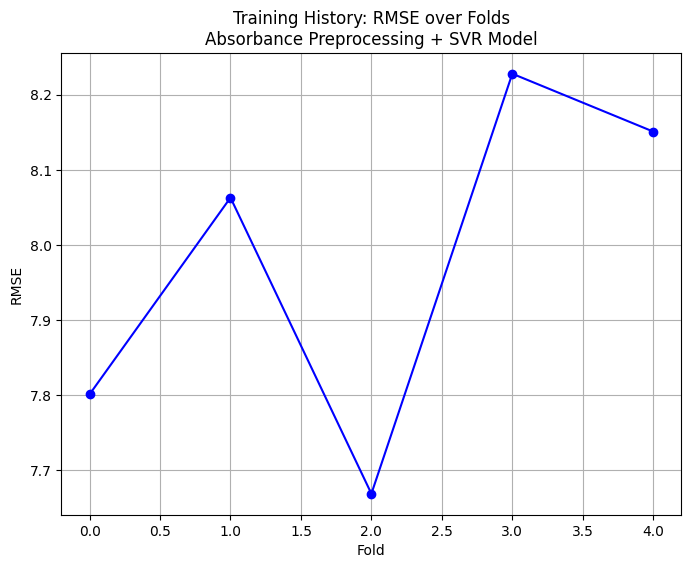

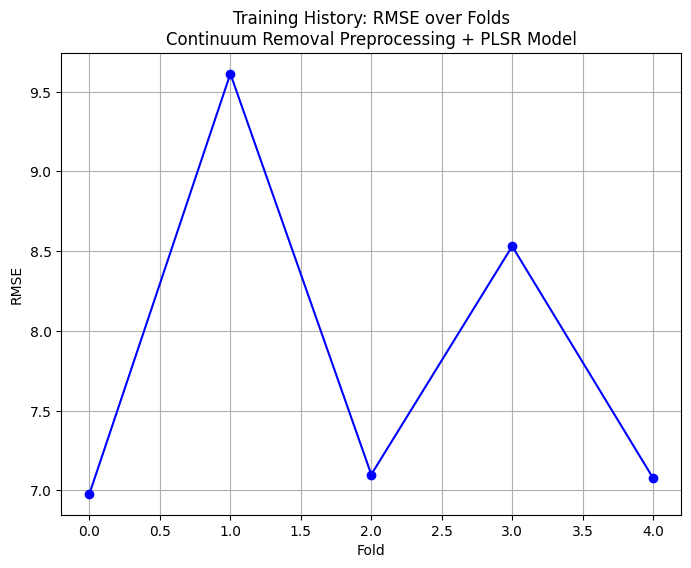

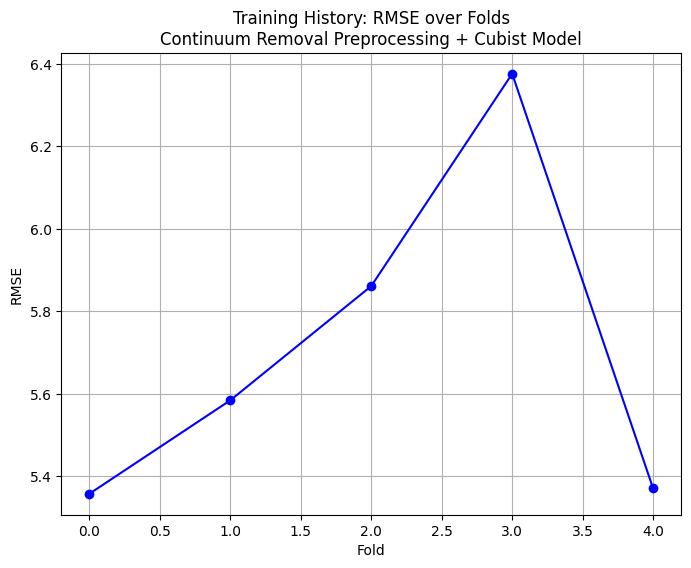

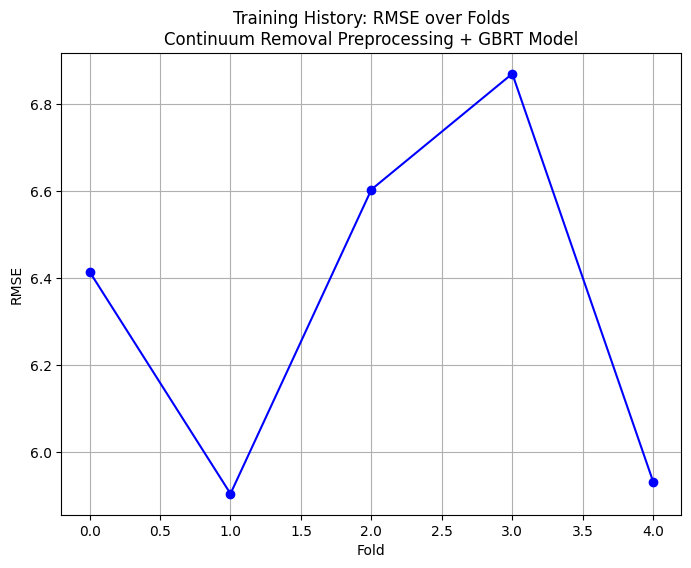

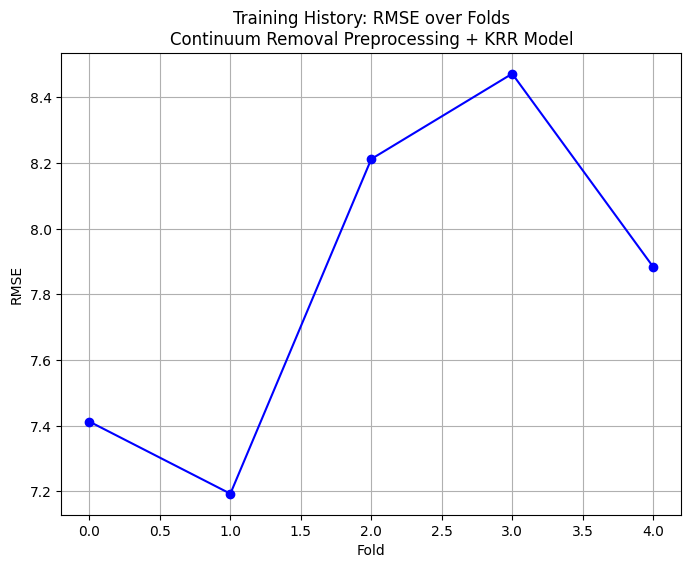

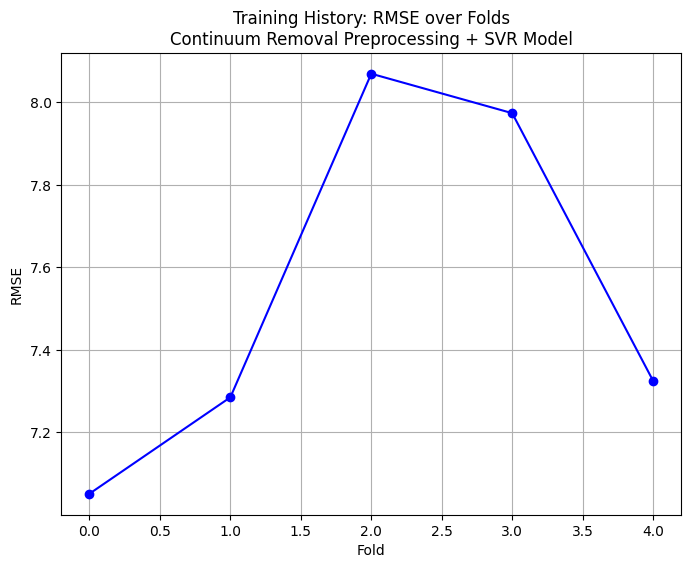

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
import pandas as pd
import numpy as np
import time
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

def no_preprocessing(X_raw):
    """
    A dummy preprocessing function that returns the data as is.
    """
    return X_raw

def run_ml_pipeline(X, y, preprocessing_functions, model_names, random_state=42):
    """
    Systematically explores combinations of preprocessing techniques and ML algorithms
    using cross-validation and hyperparameter tuning with GridSearchCV.
    Args:
        X (pd.DataFrame): The feature DataFrame.
        y (pd.Series): The target Series.
        preprocessing_functions (list): A list of tuples, where each tuple contains
                                        (name: str, function: callable).
                                        Each function takes a DataFrame and returns a transformed DataFrame.
        model_names (list): A list of strings, where each string is a model name
                            supported by get_ml_model (e.g., 'PLSR', 'Cubist').
        random_state (int): Seed for reproducibility.
    Returns:
        tuple: (pd.DataFrame, pd.DataFrame) - Detailed results per fold, and summary table per combination.
    """
    results = []
    summaries = []
    kf = KFold(n_splits=5, shuffle=True, random_state=random_state)
    for pp_name, pp_func in preprocessing_functions:
        print(f"\nApplying preprocessing: {pp_name}")
        X_preprocessed = pp_func(X.copy()) # Apply preprocessing to a copy of X
        for model_name in model_names:
            print(f" Training model: {model_name} with {pp_name} preprocessing")
            # Ensure X_preprocessed columns are strings to avoid issues with some models (e.g., cubist)
            X_preprocessed.columns = X_preprocessed.columns.astype(str)
            # Get unfitted model instance and its parameter grid
            base_model, param_grid = get_ml_model(model_name)
            start_time = time.time()
            fold_results = []
            if model_name == 'Cubist':
                # For Cubist, we manually iterate through params since GridSearchCV n_jobs=-1 causes issues
                best_cubist_model = None
                best_cubist_score = -np.inf
                best_cubist_params = {}
                # This is a simplified manual grid search for Cubist due to n_jobs incompatibility
                # In a real application, consider a dedicated library or fitting without parallelism
                for n_committees_val in param_grid['n_committees']:
                    current_cubist_model = Cubist(n_committees=n_committees_val) # Recreate for each param
                    fold_scores = []
                    # Perform internal cross-validation to find best Cubist params
                    inner_kf = KFold(n_splits=3, shuffle=True, random_state=random_state)
                    for inner_train_index, inner_val_index in inner_kf.split(X_preprocessed):
                        X_inner_train, X_inner_val = X_preprocessed.iloc[inner_train_index], X_preprocessed.iloc[inner_val_index]
                        y_inner_train, y_inner_val = y.iloc[inner_train_index], y.iloc[inner_val_index]
                        try:
                            current_cubist_model.fit(X_inner_train, y_inner_train)
                            y_inner_pred = current_cubist_model.predict(X_inner_val)
                            fold_scores.append(r2_score(y_inner_val, y_inner_pred))
                        except Exception as e:
                            print(f" Error during Cubist inner CV for n_committees={n_committees_val}: {e}")
                            fold_scores.append(np.nan)
                    mean_score = np.nanmean(fold_scores)
                    if mean_score > best_cubist_score:
                        best_cubist_score = mean_score
                        best_cubist_params = {'n_committees': n_committees_val}
                        best_cubist_model = Cubist(n_committees=n_committees_val) # Store the best unfitted model config
                if best_cubist_model is None: # Fallback if no params worked
                    best_cubist_model = Cubist(n_committees=1)
                    best_cubist_params = {'n_committees': 1}
                # Now use the best found Cubist params for the main CV folds
                for fold, (train_index, val_index) in enumerate(kf.split(X_preprocessed)):
                    X_train, X_val = X_preprocessed.iloc[train_index], X_preprocessed.iloc[val_index]
                    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    model_for_fold = Cubist(**best_cubist_params) # Re-instantiate with best params
                    try:
                        model_for_fold.fit(X_train, y_train)
                        y_pred = model_for_fold.predict(X_val)
                        this_res = {
                            'preprocessing': pp_name,
                            'model': model_name,
                            'fold': fold,
                            'best_params': best_cubist_params,
                            'y_true': y_val.tolist(),
                            'y_pred': y_pred.flatten().tolist() if isinstance(y_pred, np.ndarray) and y_pred.ndim > 1 else y_pred.tolist()
                        }
                        fold_results.append(this_res)
                        results.append(this_res)
                    except Exception as e:
                        print(f" Error training {model_name} with {pp_name} on fold {fold}: {e}")
                        this_res = {
                            'preprocessing': pp_name,
                            'model': model_name,
                            'fold': fold,
                            'best_params': best_cubist_params,
                            'y_true': y_val.tolist(),
                            'y_pred': [np.nan] * len(y_val)
                        }
                        fold_results.append(this_res)
                        results.append(this_res)
            else: # For all other models, use GridSearchCV as intended
                # Initialize GridSearchCV
                for fold, (train_index, val_index) in enumerate(kf.split(X_preprocessed)):
                    X_train, X_val = X_preprocessed.iloc[train_index], X_preprocessed.iloc[val_index]
                    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    try:
                        # Fit GridSearchCV on the current fold's training data
                        grid_search = GridSearchCV(base_model, param_grid, cv=kf,
                                                 scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=0)
                        grid_search.fit(X_train, y_train)
                        best_estimator_ = grid_search.best_estimator_
                        best_params = grid_search.best_params_
                        y_pred = best_estimator_.predict(X_val)
                        # Store results for this fold
                        this_res = {
                            'preprocessing': pp_name,
                            'model': model_name,
                            'fold': fold,
                            'best_params': best_params,
                            'y_true': y_val.tolist(),
                            'y_pred': y_pred.flatten().tolist() if isinstance(y_pred, np.ndarray) and y_pred.ndim > 1 else y_pred.tolist()
                        }
                        fold_results.append(this_res)
                        results.append(this_res)
                    except Exception as e:
                        print(f" Error training {model_name} with {pp_name} on fold {fold}: {e}")
                        # Append an entry for the failed fold to indicate the failure
                        this_res = {
                            'preprocessing': pp_name,
                            'model': model_name,
                            'fold': fold,
                            'best_params': None, # Indicate no successful params were found
                            'y_true': y_val.tolist(),
                            'y_pred': [np.nan] * len(y_val) # Use NaN for predictions if model failed
                        }
                        fold_results.append(this_res)
                        results.append(this_res)

            # After all folds for this combination
            end_time = time.time()
            total_time = end_time - start_time

            # Compute summary metrics
            fold_rmses = []
            fold_r2s = []
            for res in fold_results:
                y_t = np.array(res['y_true'])
                y_p = np.array(res['y_pred'])
                if not np.isnan(y_p).all():
                    rmse = np.sqrt(mean_squared_error(y_t, y_p))
                    r2 = r2_score(y_t, y_p)
                    fold_rmses.append(rmse)
                    fold_r2s.append(r2)
                else:
                    fold_rmses.append(np.nan)
                    fold_r2s.append(np.nan)

            mean_rmse = np.nanmean(fold_rmses) if fold_rmses else np.nan
            std_rmse = np.nanstd(fold_rmses) if fold_rmses else np.nan
            mean_r2 = np.nanmean(fold_r2s) if fold_r2s else np.nan
            std_r2 = np.nanstd(fold_r2s) if fold_r2s else np.nan
            best_params_str = str(fold_results[0]['best_params']) if fold_results else '{}'

            summaries.append({
                'preprocessing': pp_name,
                'model': model_name,
                'total_time': total_time,
                'mean_rmse': mean_rmse,
                'std_rmse': std_rmse,
                'mean_r2': mean_r2,
                'std_r2': std_r2,
                'best_params': best_params_str
            })

    return pd.DataFrame(results), pd.DataFrame(summaries)

# Define the preprocessing functions to be used in the pipeline
# Using the functions defined in previous steps
preprocessing_steps = [
    ('None', no_preprocessing),
    ('Reflectance', apply_reflectance),
    ('Absorbance', apply_absorbance),
    ('Continuum Removal', apply_continuum_removal)
]
# Define the ML model names
ml_algorithms = ['PLSR', 'Cubist', 'GBRT', 'KRR', 'SVR']
# Run the pipeline (assuming X_new and y_new are already defined from previous steps)
pipeline_results, summary_table = run_ml_pipeline(X_new, y_new, preprocessing_steps, ml_algorithms)
print("\nPipeline execution complete.")
print("\nSummary Table:")
display(summary_table)
print("\nDisplaying first 5 rows of detailed results:")
display(pipeline_results.head())

# Generate and show Training History graphs for each combination
print("\nGenerating Training History Graphs:")
unique_combos = pipeline_results[['preprocessing', 'model']].drop_duplicates()
for idx, combo in unique_combos.iterrows():
    pp_name = combo['preprocessing']
    model_name = combo['model']
    combo_df = pipeline_results[(pipeline_results['preprocessing'] == pp_name) & (pipeline_results['model'] == model_name)]
    folds = sorted(combo_df['fold'].unique())
    rmses = []
    for fold in folds:
        res = combo_df[combo_df['fold'] == fold].iloc[0]
        y_true = np.array(res['y_true'])
        y_pred = np.array(res['y_pred'])
        if not np.isnan(y_pred).all():
            rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        else:
            rmse = np.nan
        rmses.append(rmse)
    plt.figure(figsize=(8, 6))
    plt.plot(folds, rmses, marker='o', linestyle='-', color='b')
    plt.title(f'Training History: RMSE over Folds\n{pp_name} Preprocessing + {model_name} Model')
    plt.xlabel('Fold')
    plt.ylabel('RMSE')
    plt.grid(True)
    plt.show()

In [49]:
metrics_results = pipeline_results.apply(lambda row: calculate_metrics(row['y_true'], row['y_pred']), axis=1)

# Expand the results into new columns
pipeline_results[['r_squared', 'rmse', 'rpd']] = pd.DataFrame(metrics_results.tolist(), index=pipeline_results.index)

print("Evaluation metrics calculated and added to pipeline_results DataFrame.")
print("Displaying the head of the updated pipeline_results:")
display(pipeline_results.head())

Evaluation metrics calculated and added to pipeline_results DataFrame.
Displaying the head of the updated pipeline_results:


,preprocessing,model,fold,best_params,y_true,y_pred,r_squared,rmse,rpd
0,None,PLSR,0,{'n_components': 5},"[23.49, 10.34, 24.26, 21.37, 2.88, 43.64, 5.8,...","[5.275356408618801, 20.38916492333383, 7.57516...",0.722867,7.737881,1.899572
1,None,PLSR,1,{'n_components': 5},"[24.63, 12.87, 6.16, 8.69, 53.99, 16.27, 2.01,...","[33.09327877142053, 15.626508866004947, 7.9334...",0.817518,6.862528,2.340938
2,None,PLSR,2,{'n_components': 5},"[4.51, 11.62, 9.09, 12.9, 41.26, 3.26, 25.17, ...","[12.351201102782685, 29.688983783942632, 16.77...",0.604636,8.899130,1.590383
3,None,PLSR,3,{'n_components': 5},"[19.66, 26.47, 21.35, 47.97, 8.31, 29.78, 5.8,...","[22.978363387771488, 27.835963205679665, 26.14...",0.767904,7.563155,2.075706
4,None,PLSR,4,{'n_components': 5},"[5.29, 17.95, 20.48, 29.46, 4.91, 16.25, 5.4, ...","[5.406918300632491, 14.763844435052398, 15.104...",0.709783,8.235695,1.856258


In [50]:
def create_leaderboard(pipeline_results_df):
    """
    Generates a leaderboard of models based on average evaluation metrics and best parameters.

    Args:
        pipeline_results_df (pd.DataFrame): DataFrame containing pipeline results with metrics.

    Returns:
        pd.DataFrame: A leaderboard DataFrame sorted by RPD in descending order, including best parameters.
    """
    # Aggregate mean metrics
    leaderboard = pipeline_results_df.groupby(['preprocessing', 'model']).agg(
        mean_r_squared=('r_squared', 'mean'),
        mean_rmse=('rmse', 'mean'),
        mean_rpd=('rpd', 'mean')
    ).reset_index()

    # Retrieve best_params from the first fold (fold=0) for each unique combination
    # Assuming best_params are consistent across folds after GridSearchCV, or that we just want one example.
    best_params_df = pipeline_results_df[pipeline_results_df['fold'] == 0][['preprocessing', 'model', 'best_params']]
    leaderboard = pd.merge(leaderboard, best_params_df, on=['preprocessing', 'model'], how='left')

    # Sort the leaderboard, primarily by RPD (higher is better), then R-squared (higher is better),
    # then RMSE (lower is better)
    leaderboard_sorted = leaderboard.sort_values(
        by=['mean_rpd', 'mean_r_squared', 'mean_rmse'],
        ascending=[False, False, True]
    )
    return leaderboard_sorted

# Generate and display the updated leaderboard
model_leaderboard = create_leaderboard(pipeline_results)

print("\nUpdated Model Leaderboard (Top 10):")
display(model_leaderboard.head(10))


Updated Model Leaderboard (Top 10):


,preprocessing,model,mean_r_squared,mean_rmse,mean_rpd,best_params
15,Reflectance,Cubist,0.899537,4.797001,3.178279,{'n_committees': 10}
0,Absorbance,Cubist,0.896285,4.874737,3.126219,{'n_committees': 10}
10,None,Cubist,0.883071,5.169065,2.950317,{'n_committees': 5}
5,Continuum Removal,Cubist,0.857294,5.709824,2.668780,{'n_committees': 10}
6,Continuum Removal,GBRT,0.822962,6.344489,2.403722,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
17,Reflectance,KRR,0.793167,6.877731,2.210008,"{'alpha': 0.1, 'kernel': 'linear'}"
2,Absorbance,KRR,0.772961,7.179827,2.124463,"{'alpha': 0.1, 'kernel': 'linear'}"
16,Reflectance,GBRT,0.767042,7.282389,2.090303,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
18,Reflectance,PLSR,0.759152,7.427544,2.045830,{'n_components': 5}
3,Absorbance,PLSR,0.753718,7.476168,2.040755,{'n_components': 5}



Demonstrating Predicted vs. Actual plot for: Reflectance + Cubist


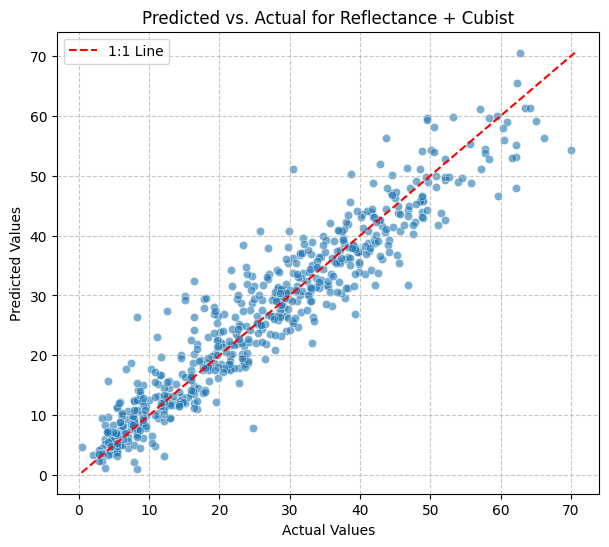

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_predictions_vs_actual(y_true, y_pred, title="Predicted vs. Actual Values", figsize=(7, 6)):
    """
    Generates a scatter plot of predicted vs. actual values with a 1:1 reference line.

    Args:
        y_true (np.array or list): Actual target values.
        y_pred (np.array or list): Predicted target values.
        title (str): Title of the plot.
        figsize (tuple): Figure size for the plot.
    """
    plt.figure(figsize=figsize)
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)

    min_val = min(min(y_true), min(y_pred))
    max_val = max(max(y_true), max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='1:1 Line')

    plt.title(title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Identify the best performing model from the updated leaderboard
best_model_row = model_leaderboard.iloc[0]
best_pp_name = best_model_row['preprocessing']
best_model_name = best_model_row['model']

print(f"\nDemonstrating Predicted vs. Actual plot for: {best_pp_name} + {best_model_name}")

# Aggregate y_true and y_pred for the selected model across all folds
model_specific_results = pipeline_results[
    (pipeline_results['preprocessing'] == best_pp_name) &
    (pipeline_results['model'] == best_model_name)
]

# Combine true and predicted values from all folds for plotting
all_y_true = []
all_y_pred = []
for _, row in model_specific_results.iterrows():
    all_y_true.extend(row['y_true'])
    all_y_pred.extend(row['y_pred'])

plot_predictions_vs_actual(all_y_true, all_y_pred,
                           title=f"Predicted vs. Actual for {best_pp_name} + {best_model_name}")



Demonstrating Permutation Feature Importance for: Reflectance + Cubist (Best Params: {'n_committees': 10})


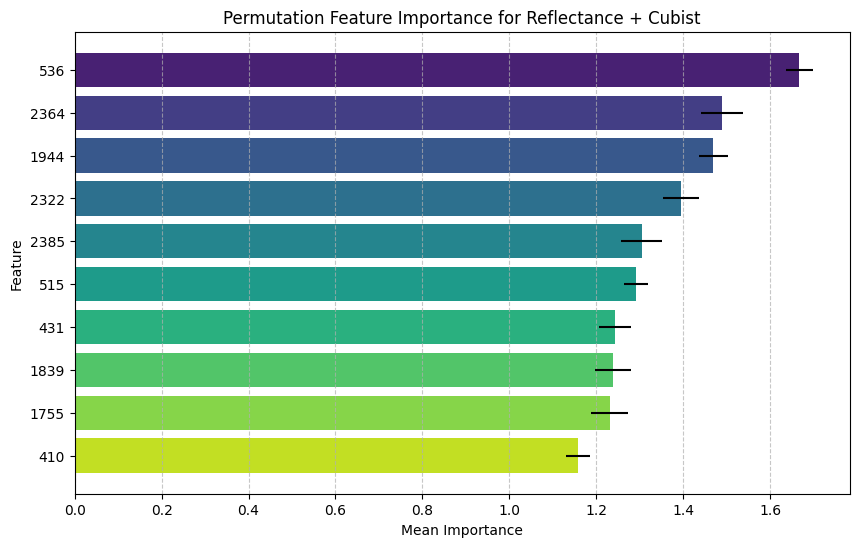

In [52]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_permutation_feature_importance(model, X_data, y_data, title="Permutation Feature Importance", n_features_to_plot=10, figsize=(10, 6)):
    """
    Generates a horizontal bar plot of permutation feature importance for a trained model.

    Args:
        model: A trained scikit-learn compatible regression model.
        X_data (pd.DataFrame): The feature DataFrame used for training.
        y_data (pd.Series): The target Series used for training.
        title (str): Title of the plot.
        n_features_to_plot (int): The number of top features to display.
        figsize (tuple): Figure size for the plot.
    """
    # Ensure X_data columns are strings, as some models (like Cubist) might expect them
    X_data_processed = X_data.copy()
    X_data_processed.columns = X_data_processed.columns.astype(str)

    # Calculate permutation importance
    result = permutation_importance(model, X_data_processed, y_data, n_repeats=10, random_state=42, n_jobs=-1)

    # Organize results into a DataFrame
    feature_importance_df = pd.DataFrame({
        'feature': X_data_processed.columns,
        'importance_mean': result.importances_mean,
        'importance_std': result.importances_std
    })

    # Sort by mean importance in descending order and select top N features
    feature_importance_df = feature_importance_df.sort_values(by='importance_mean', ascending=False)
    top_features = feature_importance_df.head(n_features_to_plot).reset_index(drop=True)

    plt.figure(figsize=figsize)
    # Use matplotlib.pyplot.barh for explicit control over x, y, and xerr
    plt.barh(y=top_features['feature'],
             width=top_features['importance_mean'],
             xerr=top_features['importance_std'],
             color=sns.color_palette('viridis', n_features_to_plot)
            )
    plt.title(title)
    plt.xlabel('Mean Importance')
    plt.ylabel('Feature')
    plt.gca().invert_yaxis() # Invert y-axis to have highest importance at the top
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

# Identify the best performing model from the updated leaderboard
best_model_row = model_leaderboard.iloc[0]
best_pp_name = best_model_row['preprocessing']
best_model_name = best_model_row['model']
best_params = best_model_row['best_params'] # Get best parameters for retraining

print(f"\nDemonstrating Permutation Feature Importance for: {best_pp_name} + {best_model_name} (Best Params: {best_params})")

# Apply the best preprocessing to the full dataset
# Retrieve the preprocessing function from the list
selected_pp_func = None
for name, func in preprocessing_steps:
    if name == best_pp_name:
        selected_pp_func = func
        break

if selected_pp_func:
    X_preprocessed_full = selected_pp_func(X_new.copy())
    # Ensure column names are strings for consistency with models
    X_preprocessed_full.columns = X_preprocessed_full.columns.astype(str)

    # Get a fresh instance of the best model with its best parameters and train it on the full preprocessed dataset
    # get_ml_model now returns (model_instance, param_grid), we only need the model_instance here
    trained_best_model, _ = get_ml_model(best_model_name, **best_params)
    trained_best_model.fit(X_preprocessed_full, y_new)

    # Plot permutation feature importance
    plot_permutation_feature_importance(
        trained_best_model,
        X_preprocessed_full,
        y_new,
        title=f"Permutation Feature Importance for {best_pp_name} + {best_model_name}"
    )
else:
    print(f"Error: Preprocessing function '{best_pp_name}' not found.")


In [53]:
import json

# 1. Access the model_leaderboard DataFrame and 2. Extract the first row
best_model_config = model_leaderboard.iloc[0]

# 3. Store the 'preprocessing' method, 'model' name, and 'best_params'
final_preprocessing_method = best_model_config['preprocessing']
final_model_name = best_model_config['model']
final_best_params = best_model_config['best_params']

# 4. Print a summary of the best model's configuration
print(f"\nOverall Best Model Configuration:\n")
print(f"  Preprocessing Method: {final_preprocessing_method}")
print(f"  Model Name: {final_model_name}")
print(f"  Best Parameters: {final_best_params}")
print(f"  Mean R-squared: {best_model_config['mean_r_squared']:.3f}")
print(f"  Mean RMSE: {best_model_config['mean_rmse']:.3f}")
print(f"  Mean RPD: {best_model_config['mean_rpd']:.3f}")

# 5. Create a Python dictionary for deployment
best_model_for_deployment = {
    'preprocessing_method': final_preprocessing_method,
    'model_name': final_model_name,
    'best_params': final_best_params,
    'metrics': {
        'mean_r_squared': best_model_config['mean_r_squared'],
        'mean_rmse': best_model_config['mean_rmse'],
        'mean_rpd': best_model_config['mean_rpd']
    }
}

# 6. Print the best_model_for_deployment dictionary in pretty-printed JSON format
print("\nBest Model for Deployment (JSON):")
print(json.dumps(best_model_for_deployment, indent=4))


Overall Best Model Configuration:

  Preprocessing Method: Reflectance
  Model Name: Cubist
  Best Parameters: {'n_committees': 10}
  Mean R-squared: 0.900
  Mean RMSE: 4.797
  Mean RPD: 3.178

Best Model for Deployment (JSON):
{
    "preprocessing_method": "Reflectance",
    "model_name": "Cubist",
    "best_params": {
        "n_committees": 10
    },
    "metrics": {
        "mean_r_squared": 0.899537119790236,
        "mean_rmse": 4.797001338285475,
        "mean_rpd": 3.178279065275519
    }
}
